# Import Library

In [430]:
# Data manipulation and analysis
import polars as pl

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Understanding

## Import Dataset

In [431]:
# Read Excel data with Polars (requires pyxlsb or openpyxl for .xlsx)
df = pl.read_excel('Insurance Data.xlsx')

# Display the first few rows
df

Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
str,i64,str,str,str,str,str,str,str,str,str,date,date,str,i64,str,i64,f64,f64,str,str,str,str,str,str,i64,i64,str,str,str
"""CUST000001""",43,"""Female""","""Married""","""Student""","""Medium""","""High School""","""Suburban""","""West Lisa""","""Inactive""","""Frequent""",2023-01-16,2024-08-22,"""3+ Claims""",5,"""Life""",277063,2122.99,868.09,"""Quarterly""","""Eco-Friendly""","""SMS""","""Morning""","""Mandarin""","""Low""",4,470,"""Minor Violations""","""Retirement""","""C"""
"""CUST000002""",22,"""Female""","""Married""","""Student""","""Medium""","""Master""","""Urban""","""Tyroneville""","""""","""One-time""",2022-03-21,2024-11-07,"""No Claims""",10,"""Life""",102202,4928.58,782.75,"""Semi-Annual""","""Eco-Friendly""","""Email""","""Evening""","""Indonesian""","""Low""",3,577,"""Clean""","""Divorce""","""A"""
"""CUST000003""",63,"""Male""","""Divorced""","""Retired""","""Low""","""High School""","""Urban""","""Jaredbury""","""Occasional""","""Infrequent""",2020-10-21,2024-12-20,"""No Claims""",13,"""Home""",468469,4528.29,1283.98,"""Semi-Annual""","""Fast Service""","""Phone""","""Morning""","""Spanish""","""Medium""",3,390,"""Major Violations""","""Divorce""","""B"""
"""CUST000004""",60,"""Female""","""Widowed""","""Business Owner""","""High""","""Bachelor""","""Suburban""","""Johnhaven""","""Active""","""One-time""",2021-09-02,2024-07-29,"""No Claims""",13,"""Multiple""",819239,1415.09,1502.43,"""Monthly""","""Eco-Friendly""","""Phone""","""Evening""","""Spanish""","""Low""",4,662,"""Minor Violations""","""Marriage""","""D"""
"""CUST000005""",55,"""Male""","""Married""","""Teacher""","""Medium""","""PhD""","""Suburban""","""Davidton""","""Active""","""Infrequent""",2020-11-10,2025-02-27,"""1-2 Claims""",17,"""Health""",914230,3892.71,1584.62,"""Annual""","""Comprehensive Coverage""","""SMS""","""Morning""","""French""","""Low""",0,340,"""Major Violations""","""Childbirth""","""B"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""CUST149996""",20,"""Female""","""Divorced""","""Business Owner""","""High""","""""","""Urban""","""Bensonview""","""Occasional""","""One-time""",2022-01-02,2024-06-13,"""3+ Claims""",12,"""Multiple""",243014,1430.08,1502.58,"""Annual""","""Fast Service""","""Phone""","""Morning""","""French""","""Low""",0,484,"""Clean""","""Marriage""","""A"""
"""CUST149997""",19,"""Female""","""Married""","""Retired""","""High""","""PhD""","""Rural""","""East Brian""","""New""","""Infrequent""",2022-05-07,2025-01-30,"""No Claims""",8,"""Home""",564522,1093.55,1995.5,"""Annual""","""Eco-Friendly""","""SMS""","""Afternoon""","""Spanish""","""Low""",1,789,"""Minor Violations""","""Divorce""","""D"""
"""CUST149998""",57,"""Male""","""Married""","""Teacher""","""""","""High School""","""Suburban""","""Tammyfort""","""Active""","""Frequent""",2023-11-27,2025-04-07,"""3+ Claims""",7,"""Home""",658445,4999.39,141.81,"""Annual""","""Comprehensive Coverage""","""Email""","""Afternoon""","""Spanish""","""High""",1,337,"""Clean""","""Childbirth""","""A"""


## Informasi Data

In [432]:
print(f"Rows: {df.height}, Columns: {df.width}")

Rows: 150000, Columns: 30


In [433]:
print("Columns:", df.columns)

Columns: ['Customer ID', 'Age', 'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level', 'Geographic Information', 'Location', 'Behavioral Data', 'Purchase History', 'Policy Start Date', 'Policy Renewal Date', 'Claim History', 'Interactions with Customer Service', 'Insurance Products Owned', 'Coverage Amount', 'Premium Amount', 'Deductible', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language', 'Risk Profile', 'Previous Claims History', 'Credit Score', 'Driving Record', 'Life Events', 'Segmentation Group']


In [434]:
print("Data types:", df.dtypes)

Data types: [String, Int64, String, String, String, String, String, String, String, String, String, Date, Date, String, Int64, String, Int64, Float64, Float64, String, String, String, String, String, String, Int64, Int64, String, String, String]


In [435]:
categorical_cols = [
    'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level',
    'Geographic Information', 'Behavioral Data', 'Purchase History', 'Claim History', 'Insurance Products Owned',
    'Policy Type', 'Customer Preferences', 'Preferred Communication Channel',
    'Preferred Contact Time', 'Preferred Language', 'Risk Profile',
    'Driving Record', 'Life Events', 'Segmentation Group'
]

for col in categorical_cols:
    if col in df.columns:
        unique_vals = df.select(pl.col(col).unique())[col].to_list()
        print(f"Unique values in '{col}' ({len(unique_vals)} total): {unique_vals}")
    else:
        print(f"Column '{col}' not found in DataFrame.")


Unique values in 'Gender' (3 total): ['Male', 'Non-Binary', 'Female']
Unique values in 'Marital Status' (4 total): ['Divorced', 'Widowed', 'Married', 'Single']
Unique values in 'Occupation' (8 total): ['Student', 'Business Owner', 'Lawyer', 'Engineer', 'Unemployed', 'Doctor', 'Retired', 'Teacher']
Unique values in 'Income Level' (5 total): ['Low', 'High', '', 'Medium', 'Very High']
Unique values in 'Education Level' (5 total): ['High School', '', 'Master', 'PhD', 'Bachelor']
Unique values in 'Geographic Information' (3 total): ['Suburban', 'Urban', 'Rural']
Unique values in 'Behavioral Data' (5 total): ['Occasional', '', 'Inactive', 'New', 'Active']
Unique values in 'Purchase History' (3 total): ['One-time', 'Frequent', 'Infrequent']
Unique values in 'Claim History' (4 total): ['3+ Claims', 'No Claims', '1-2 Claims', '']
Unique values in 'Insurance Products Owned' (6 total): ['Travel', 'Home', 'Health', 'Auto', 'Life', 'Multiple']
Unique values in 'Policy Type' (4 total): ['Monthly', '

## Deskripsi Dataset

In [436]:
# Select only numeric columns (integer and float)
numeric_types = [pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64, pl.Float32, pl.Float64]
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in numeric_types]

# Describe only numeric columns
df.select(numeric_cols).describe()

statistic,Age,Interactions with Customer Service,Coverage Amount,Premium Amount,Deductible,Previous Claims History,Credit Score
str,f64,f64,f64,f64,f64,f64,f64
"""count""",150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",48.4473,9.470887,504721.832553,2545.394752,1051.883134,1.996993,573.902347
"""std""",17.909818,5.77012,285601.378292,1416.633851,549.612108,1.412996,158.736283
"""min""",18.0,0.0,10001.0,100.0,100.01,0.0,300.0
"""25%""",33.0,4.0,257403.0,1315.76,575.77,1.0,437.0
"""50%""",48.0,9.0,504614.0,2545.04,1050.31,2.0,573.0
"""75%""",64.0,14.0,751410.0,3772.11,1529.88,3.0,711.0
"""max""",79.0,19.0,999996.0,4999.96,1999.99,4.0,849.0


## Cek Missing Values

In [437]:
import polars as pl

missing_counts = []
for col in df.columns:
    if df[col].dtype == pl.Utf8:
        missing_counts.append((df[col] == '').sum())
    else:
        missing_counts.append(0)

missing_df = pl.DataFrame([missing_counts], schema=df.columns)
print("Missing values per column:")
missing_df

Missing values per column:


C:\Users\acer\AppData\Local\Temp\ipykernel_34620\56471726.py:10: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  missing_df = pl.DataFrame([missing_counts], schema=df.columns)


Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,0,0,0,0,7500,7500,0,0,7500,0,0,0,7500,0,0,0,0,0,0,0,0,0,0,7500,0,0,0,0,0


## Cek Duplikat Data

In [438]:
num_duplicates = df.is_duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


# Data Visualization

In [439]:
pdf = df.to_pandas()

## Visualisasi Data Numerik

### Visualisasi Histogram

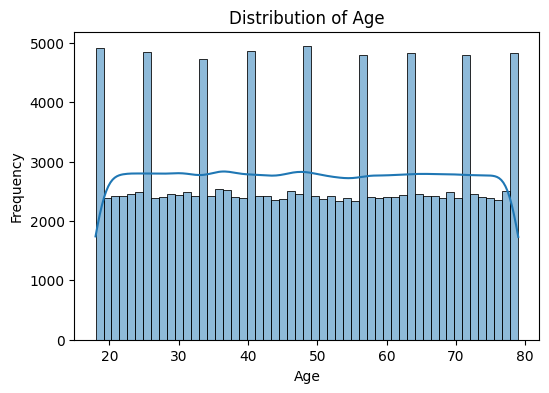

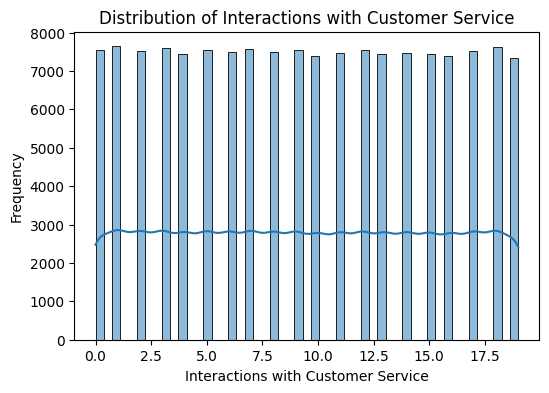

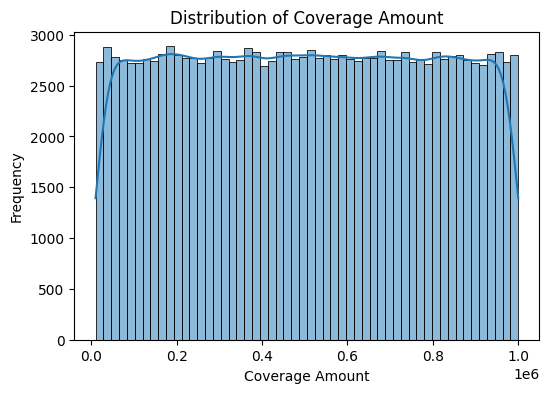

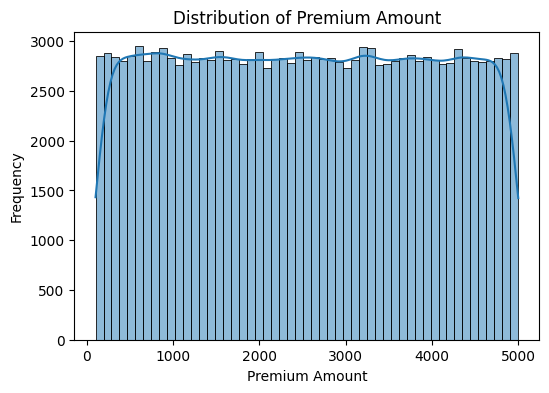

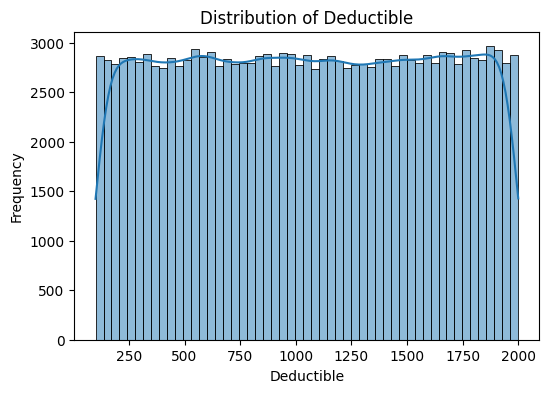

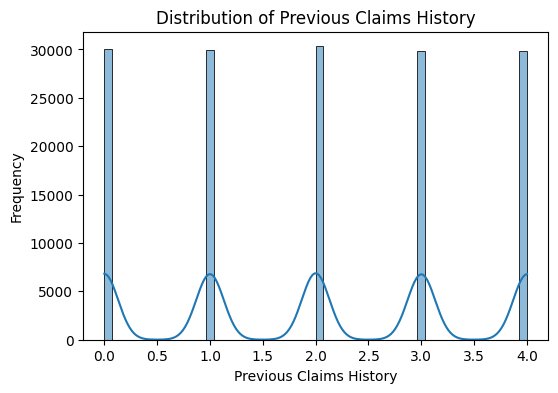

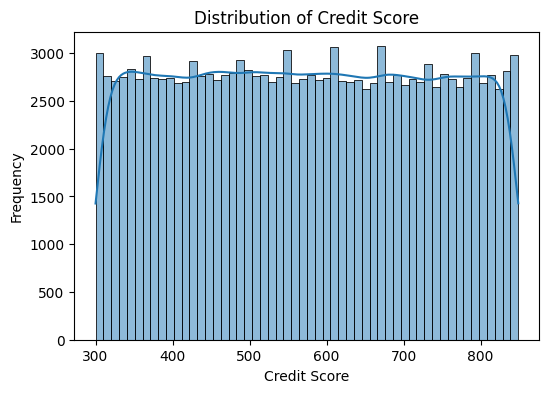

In [440]:
distribution_cols = pdf.select_dtypes(include=['number']).columns
for col in distribution_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(pdf[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Visualisasi Boxplot

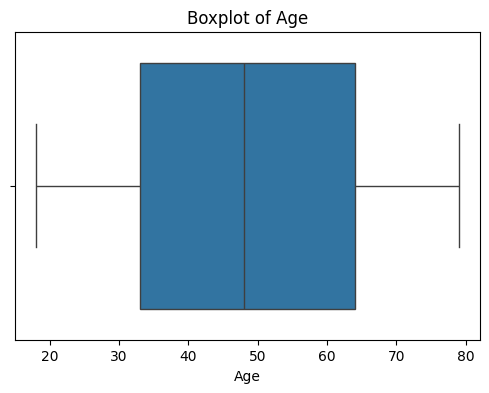

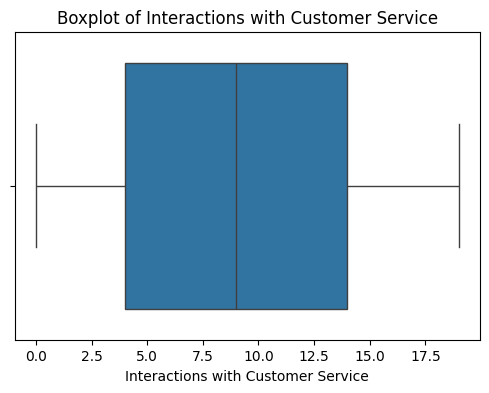

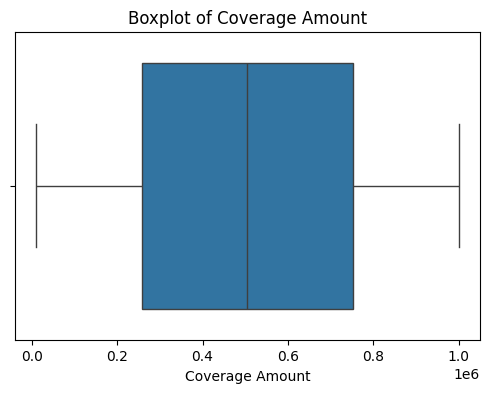

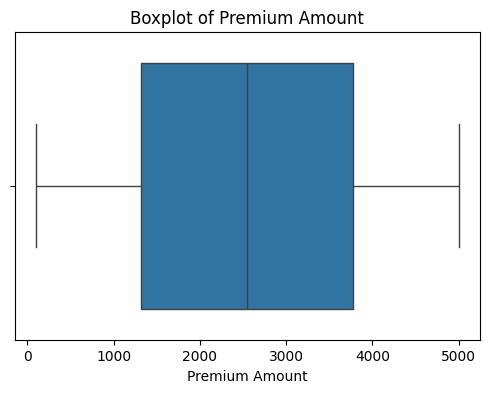

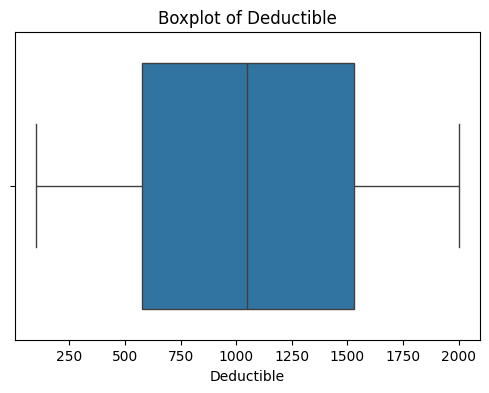

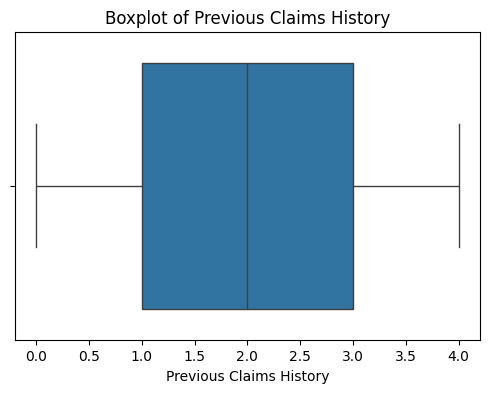

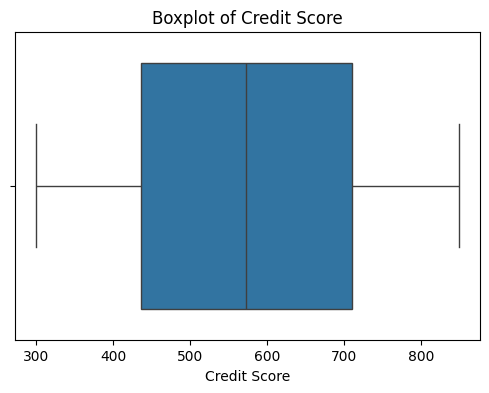

In [441]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=pdf[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

### Visualisasi Korelasi Heatmap

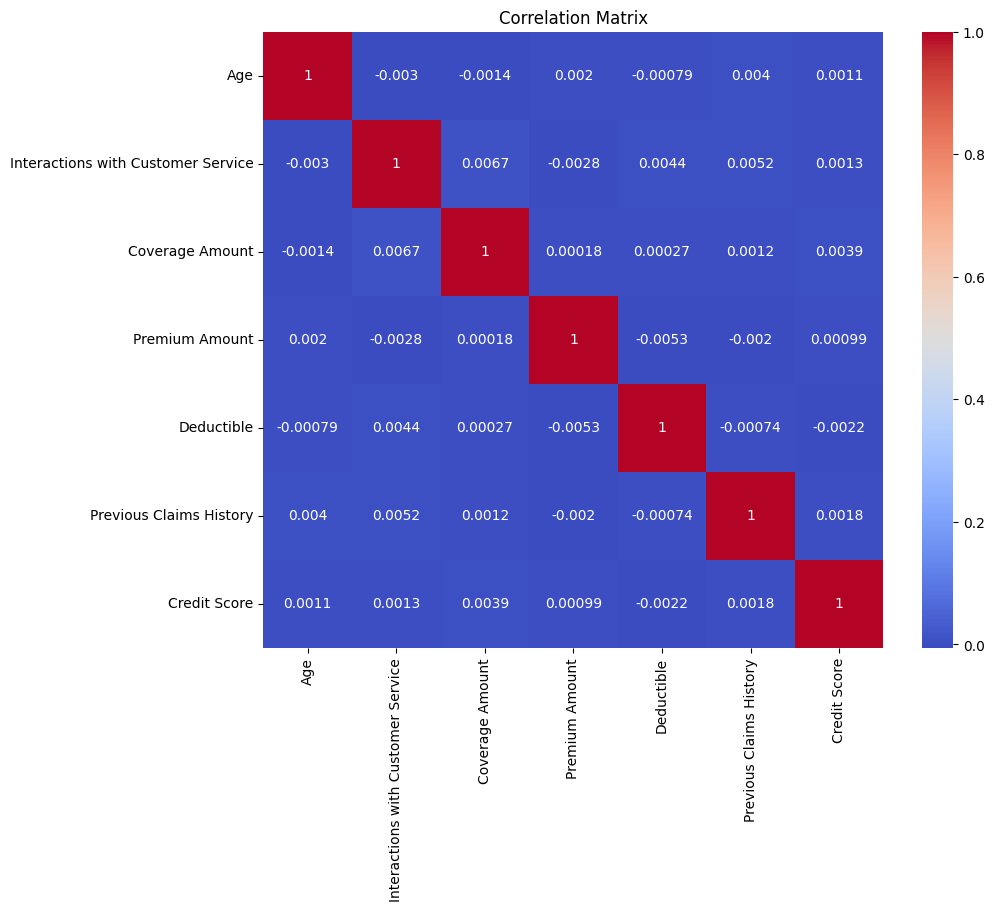

In [442]:
plt.figure(figsize=(10, 8))
corr = pdf[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Visualisasi Data Kategorik

### Visualisasi Histogram

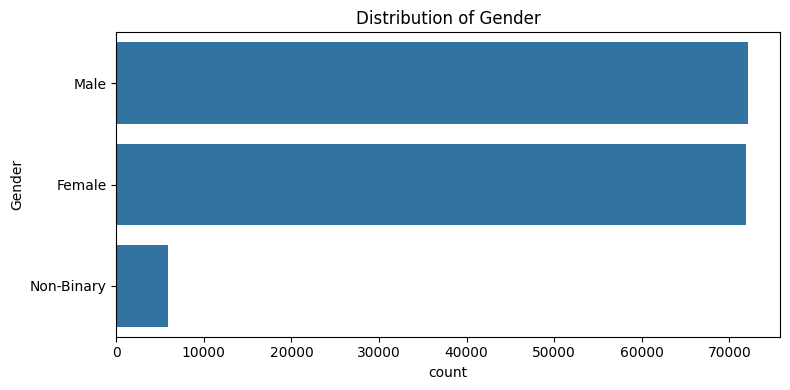

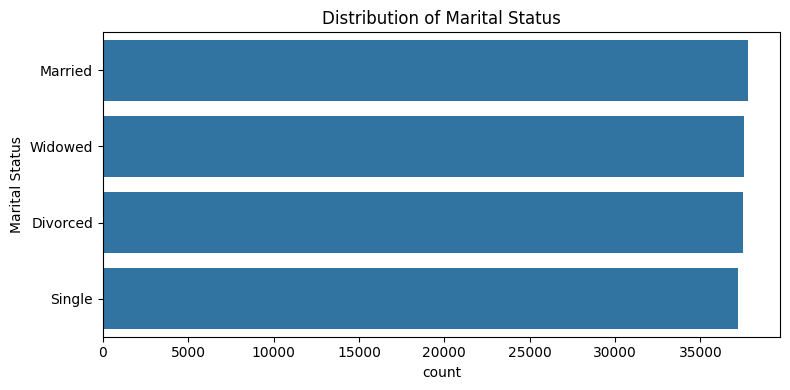

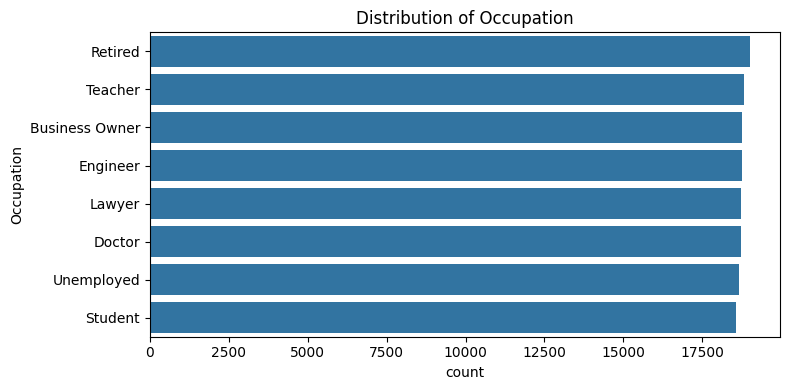

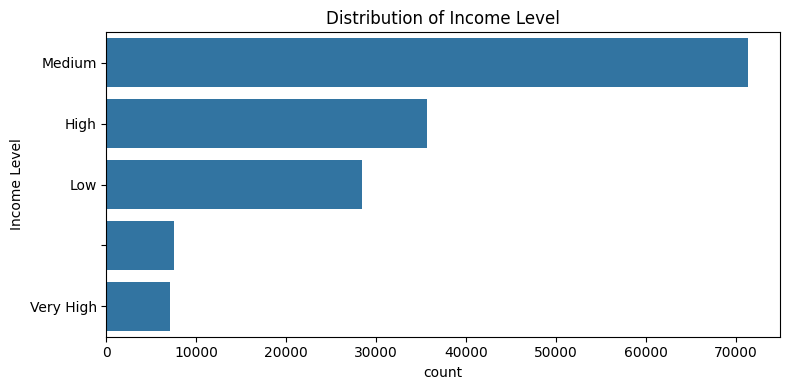

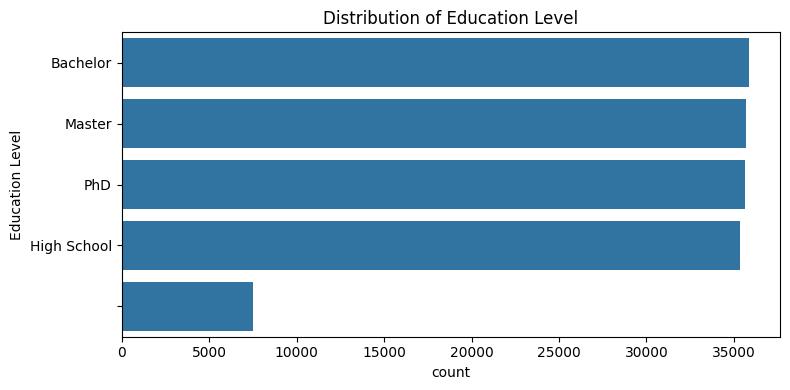

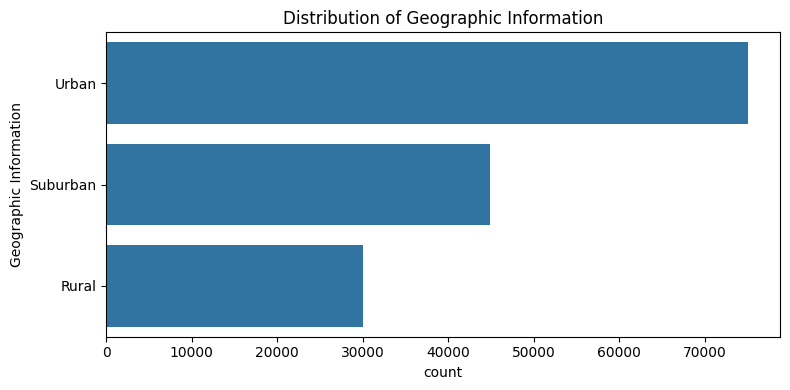

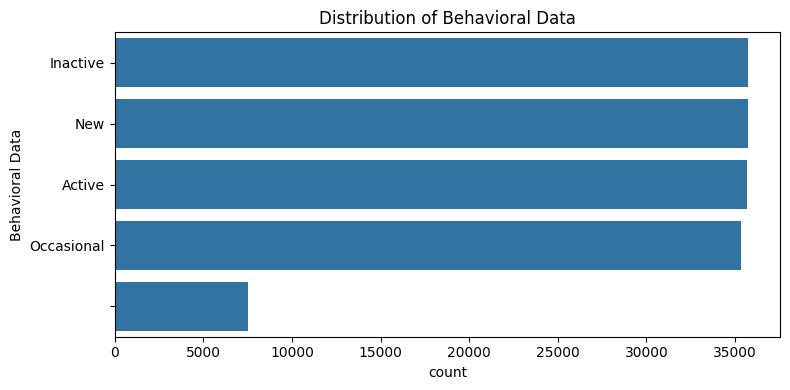

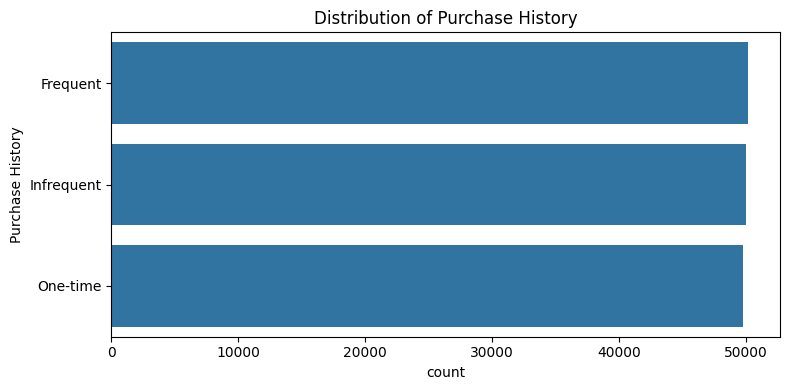

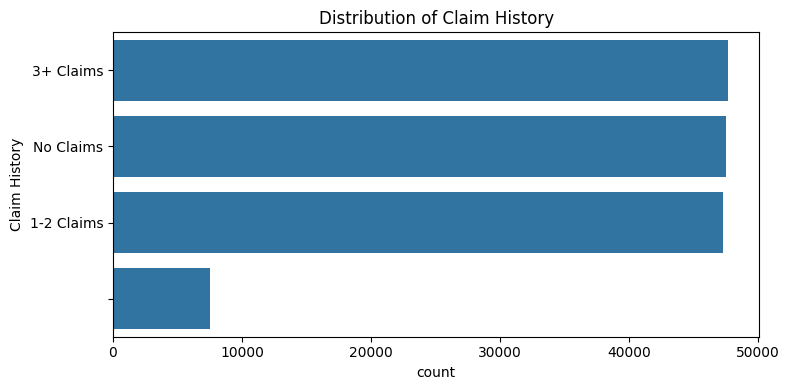

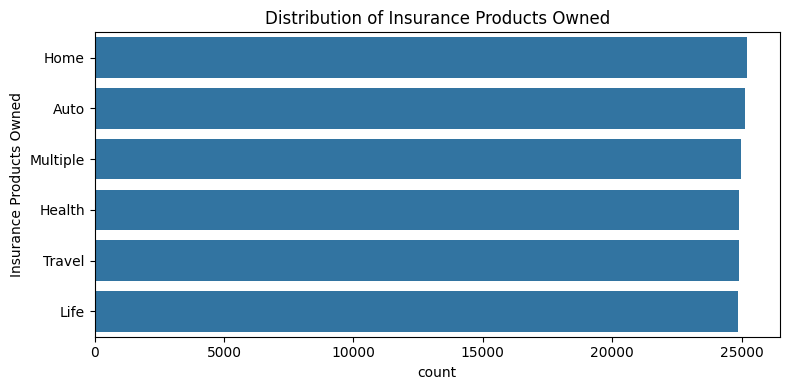

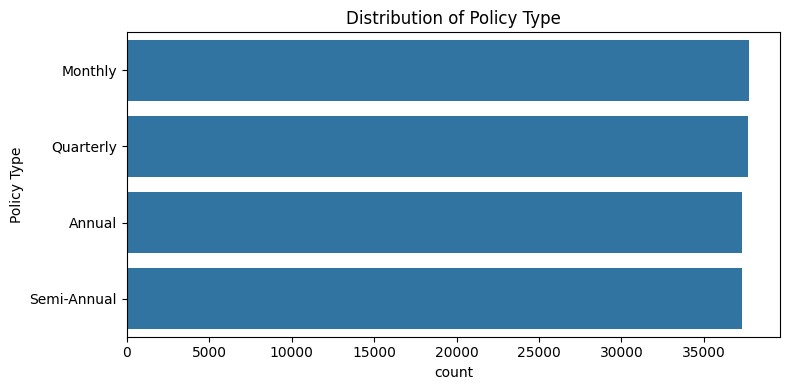

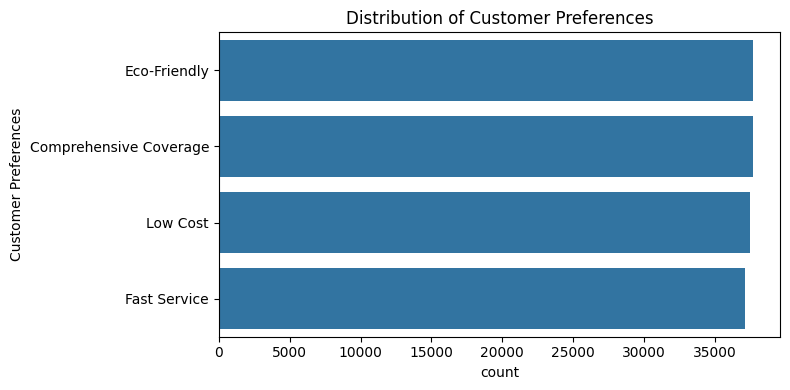

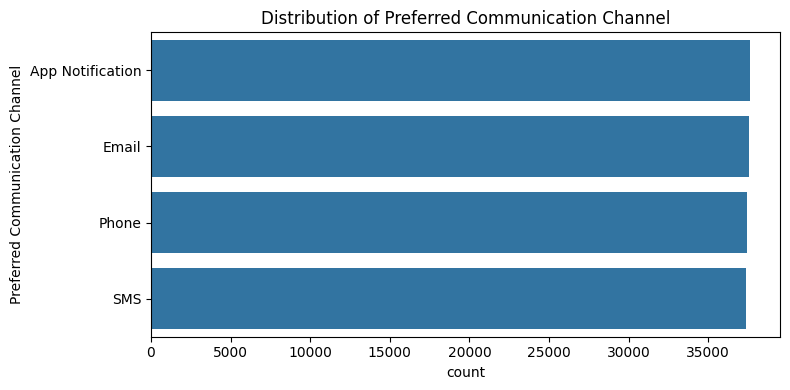

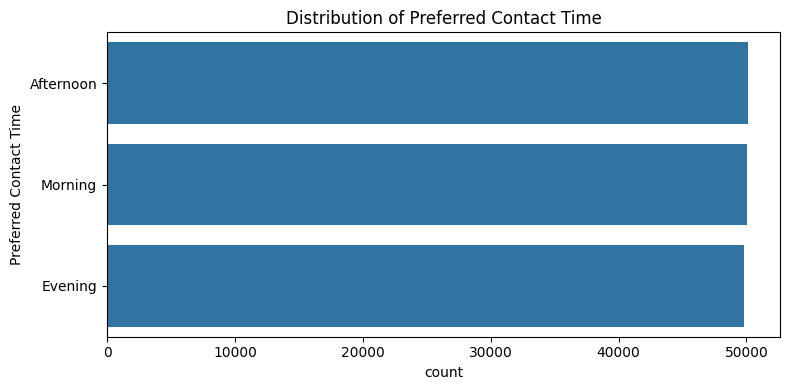

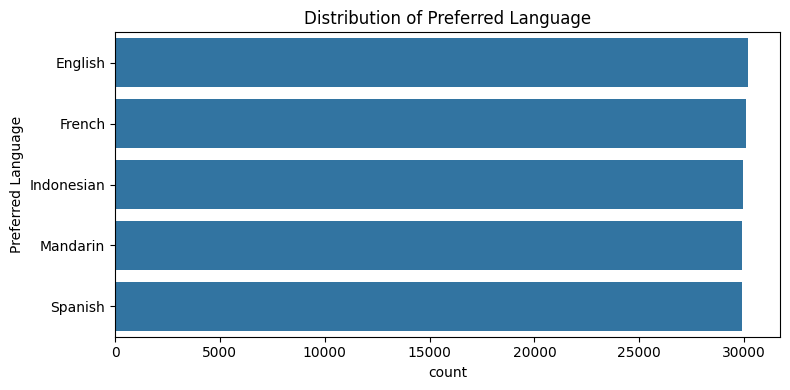

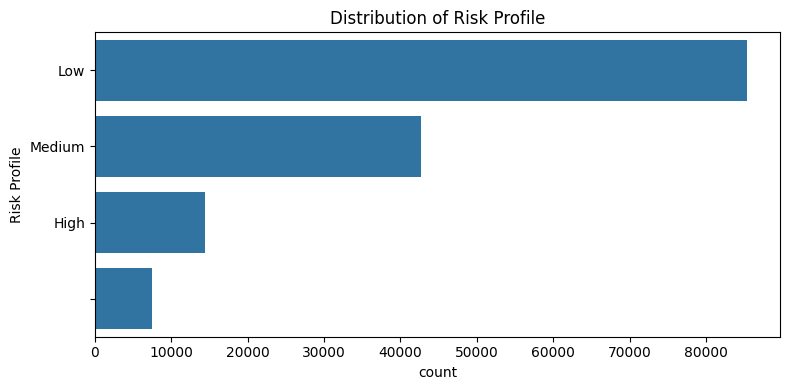

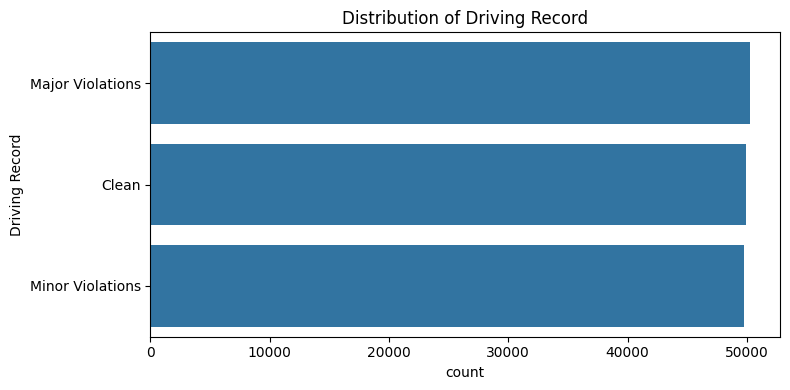

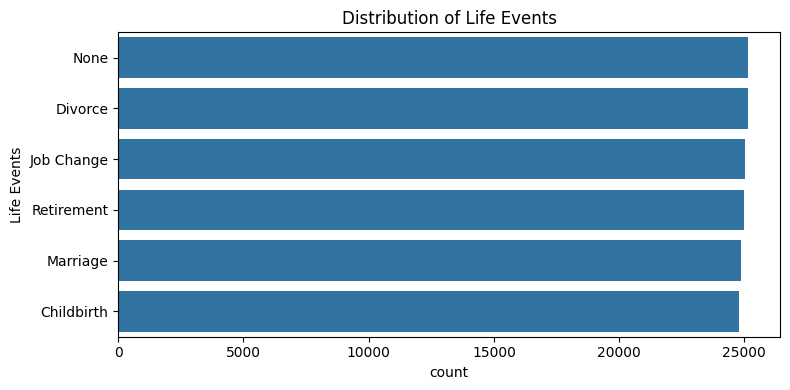

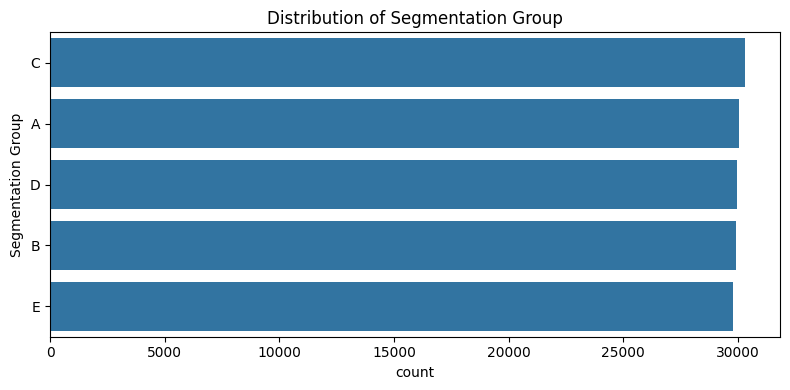

In [443]:
# List of categorical columns to visualize
categorical_cols = [
    'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level',
    'Geographic Information', 'Behavioral Data', 'Purchase History', 'Claim History', 'Insurance Products Owned',
    'Policy Type', 'Customer Preferences', 'Preferred Communication Channel',
    'Preferred Contact Time', 'Preferred Language', 'Risk Profile',
    'Driving Record', 'Life Events', 'Segmentation Group'
]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

## Visualisasi Distribusi Target

### Visualisasi Histogram

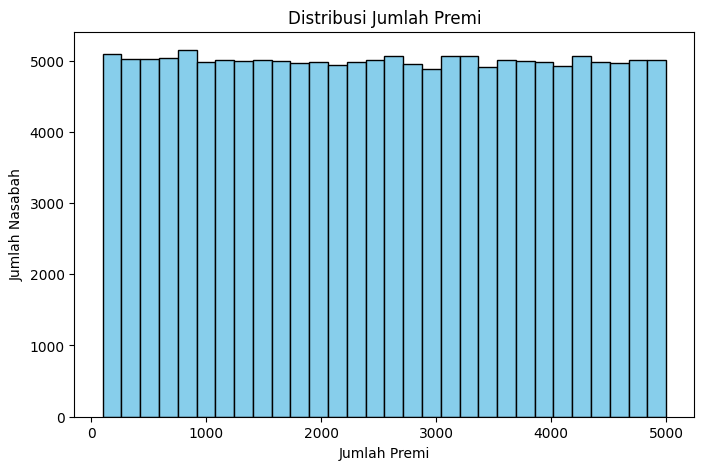

In [444]:
plt.figure(figsize=(8, 5))
plt.hist(df['Premium Amount'].to_pandas(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Premi')
plt.xlabel('Jumlah Premi')
plt.ylabel('Jumlah Nasabah')
plt.show()

# Data Prepocessing

## Handling Missing Values

In [445]:
for col in ['Income Level', 'Education Level', 'Behavioral Data', 'Claim History', 'Risk Profile']:
    mode = df.filter(pl.col(col) != '').select(pl.col(col)).to_series().mode()[0]
    df = df.with_columns(
        pl.when(pl.col(col) == '').then(pl.lit(mode)).otherwise(pl.col(col)).alias(col)
    )

In [446]:
missing_counts_after = []
for col in df.columns:
    if df[col].dtype == pl.Utf8:
        missing_counts_after.append((df[col] == '').sum())
    else:
        missing_counts_after.append(0)

missing_df_after = pl.DataFrame([missing_counts_after], schema=df.columns)
print("Missing values per column setelah imputasi:")
missing_df_after

Missing values per column setelah imputasi:


C:\Users\acer\AppData\Local\Temp\ipykernel_34620\1576231910.py:8: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  missing_df_after = pl.DataFrame([missing_counts_after], schema=df.columns)


Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Engineering

In [447]:
def map_categorical(col_name: str, mapping: dict, default=0):
    expr = None
    for key, val in mapping.items():
        cond = (pl.col(col_name) == key)
        if expr is None:
            expr = pl.when(cond).then(val)
        else:
            expr = expr.when(cond).then(val)
    expr = expr.otherwise(default)
    return expr.alias(col_name + " Numeric")

In [448]:
def feature_engineering(df: pl.DataFrame) -> pl.DataFrame:
    # Parsing tanggal hanya jika belum bertipe Date
    for col in ["Policy Start Date", "Policy Renewal Date"]:
        if df[col].dtype != pl.Date:
            df = df.with_columns([
                pl.col(col).str.strptime(pl.Date).alias(col)
            ])
    
    # Hitung durasi polis dalam hari dan bulan
    df = df.with_columns(
        (pl.col("Policy Renewal Date").cast(pl.Int64) - pl.col("Policy Start Date").cast(pl.Int64))
        .alias("Policy Duration Days")
    )
    
    df = df.with_columns(
        (pl.col("Policy Duration Days") / 30).cast(pl.Int32).alias("Policy Duration Months")
    )
    
    # Mapping kategori ke numerik
    risk_profile_map = {"Low": 1, "Medium": 2, "High": 3}
    df = df.with_columns([
        map_categorical("Risk Profile", risk_profile_map)
    ])
    
    income_level_map = {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
    df = df.with_columns([
        map_categorical("Income Level", income_level_map)
    ])
    
    marital_status_map = {"Single": 1, "Married": 2, "Divorced": 3, "Widowed": 4}
    df = df.with_columns([
        map_categorical("Marital Status", marital_status_map)
    ])
    
    # Mapping Driving Record
    driving_record_map = {"Clean": 0, "Minor Violations": 1, "Major Violations": 2}
    df = df.with_columns([
        map_categorical("Driving Record", driving_record_map)
    ])
    
    # Mapping Life Events (contoh)
    life_events_map = {
        "None": 0,
        "Marriage": 1,
        "Childbirth": 1,
        "Divorce": 2,
        "Retirement": 3
    }
    df = df.with_columns([
        map_categorical("Life Events", life_events_map)
    ])
    
    # Mapping Segmentation Group (jika kategori)
    segmentation_map = {k: i for i, k in enumerate(df.select("Segmentation Group").unique().to_series().to_list())}
    df = df.with_columns([
        map_categorical("Segmentation Group", segmentation_map)
    ])
    
    # Binning Age menjadi kategori umur
    if "Age" in df.columns:
        df = df.with_columns([
            pl.when(pl.col("Age") < 30).then(pl.lit("Young"))
            .when((pl.col("Age") >= 30) & (pl.col("Age") < 50)).then(pl.lit("Middle-Aged"))
            .otherwise(pl.lit("Senior"))
            .alias("Age Group")
        ])
    
    # Interaksi fitur
    if "Age" in df.columns and "Coverage Amount" in df.columns:
        df = df.with_columns([
            (pl.col("Age") * pl.col("Coverage Amount")).alias("Age_Coverage_Interaction")
        ])
    if "Coverage Amount" in df.columns and "Deductible" in df.columns:
        df = df.with_columns([
            (pl.col("Coverage Amount") * pl.col("Deductible")).alias("Coverage_Deductible_Interaction")
        ])
    if "Credit Score" in df.columns and "Risk Profile Numeric" in df.columns:
        df = df.with_columns([
            (pl.col("Credit Score") * pl.col("Risk Profile Numeric")).alias("Credit_Risk_Interaction")
        ])
    if "Income Level Numeric" in df.columns and "Marital Status Numeric" in df.columns:
        df = df.with_columns([
            (pl.col("Income Level Numeric") * pl.col("Marital Status Numeric")).alias("Income_Marital_Interaction")
        ])
    
    # Log transform untuk fitur skewed
    if "Coverage Amount" in df.columns:
        df = df.with_columns([
            pl.col("Coverage Amount").log1p().alias("Log Coverage Amount")
        ])
    if "Deductible" in df.columns:
        df = df.with_columns([
            pl.col("Deductible").log1p().alias("Log Deductible")
        ])
    
    # Ekstrak fitur tanggal tambahan
    df = df.with_columns([
        pl.col("Policy Start Date").dt.month().alias("Policy Start Month"),
        pl.col("Policy Start Date").dt.year().alias("Policy Start Year"),
        pl.col("Policy Renewal Date").dt.month().alias("Policy Renewal Month"),
        pl.col("Policy Renewal Date").dt.year().alias("Policy Renewal Year"),
    ])
    
    # Fitur klaim ada/tidak
    df = df.with_columns([
        pl.when(pl.col("Claim History") == "No Claims").then(pl.lit(0)).otherwise(pl.lit(1)).alias("Has Claims")
    ])
    
    # Fitur klaim lebih dari 1 (multiple claims)
    df = df.with_columns([
        pl.when(pl.col("Previous Claims History") > 1).then(pl.lit(1)).otherwise(pl.lit(0)).alias("Multiple Claims")
    ])
    
    # Binning untuk Interactions with Customer Service (contoh)
    if "Interactions with Customer Service" in df.columns:
        df = df.with_columns([
            pl.when(pl.col("Interactions with Customer Service") < 5).then(pl.lit("Low"))
            .when((pl.col("Interactions with Customer Service") >= 5) & (pl.col("Interactions with Customer Service") < 15)).then(pl.lit("Medium"))
            .otherwise(pl.lit("High"))
            .alias("Customer Service Interaction Level")
        ])
        # Encode fitur binning
        interaction_map = {"Low": 0, "Medium": 1, "High": 2}
        df = df.with_columns([
            map_categorical("Customer Service Interaction Level", interaction_map)
        ])
    
    # Bisa tambah mapping kategori lain yang relevan sesuai analisis Anda...
    
    return df

In [449]:
df = feature_engineering(df)
df

Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Policy Duration Days,Policy Duration Months,Risk Profile Numeric,Income Level Numeric,Marital Status Numeric,Driving Record Numeric,Life Events Numeric,Segmentation Group Numeric,Age Group,Age_Coverage_Interaction,Coverage_Deductible_Interaction,Credit_Risk_Interaction,Income_Marital_Interaction,Log Coverage Amount,Log Deductible,Policy Start Month,Policy Start Year,Policy Renewal Month,Policy Renewal Year,Has Claims,Multiple Claims,Customer Service Interaction Level,Customer Service Interaction Level Numeric
str,i64,str,str,str,str,str,str,str,str,str,date,date,str,i64,str,i64,f64,f64,str,str,str,str,str,str,i64,i64,str,str,str,i64,i32,i32,i32,i32,i32,i32,i32,str,i64,f64,i64,i32,f64,f64,i8,i32,i8,i32,i32,i32,str,i32
"""CUST000001""",43,"""Female""","""Married""","""Student""","""Medium""","""High School""","""Suburban""","""West Lisa""","""Inactive""","""Frequent""",2023-01-16,2024-08-22,"""3+ Claims""",5,"""Life""",277063,2122.99,868.09,"""Quarterly""","""Eco-Friendly""","""SMS""","""Morning""","""Mandarin""","""Low""",4,470,"""Minor Violations""","""Retirement""","""C""",584,19,1,2,2,1,3,3,"""Middle-Aged""",11913709,2.4052e8,470,4,12.532004,6.767447,1,2023,8,2024,1,1,"""Medium""",1
"""CUST000002""",22,"""Female""","""Married""","""Student""","""Medium""","""Master""","""Urban""","""Tyroneville""","""Inactive""","""One-time""",2022-03-21,2024-11-07,"""No Claims""",10,"""Life""",102202,4928.58,782.75,"""Semi-Annual""","""Eco-Friendly""","""Email""","""Evening""","""Indonesian""","""Low""",3,577,"""Clean""","""Divorce""","""A""",962,32,1,2,2,0,2,1,"""Young""",2248444,7.9999e7,577,4,11.534716,6.66409,3,2022,11,2024,0,1,"""Medium""",1
"""CUST000003""",63,"""Male""","""Divorced""","""Retired""","""Low""","""High School""","""Urban""","""Jaredbury""","""Occasional""","""Infrequent""",2020-10-21,2024-12-20,"""No Claims""",13,"""Home""",468469,4528.29,1283.98,"""Semi-Annual""","""Fast Service""","""Phone""","""Morning""","""Spanish""","""Medium""",3,390,"""Major Violations""","""Divorce""","""B""",1521,50,2,1,3,2,2,0,"""Senior""",29513547,6.0150e8,780,3,13.057227,7.158498,10,2020,12,2024,0,1,"""Medium""",1
"""CUST000004""",60,"""Female""","""Widowed""","""Business Owner""","""High""","""Bachelor""","""Suburban""","""Johnhaven""","""Active""","""One-time""",2021-09-02,2024-07-29,"""No Claims""",13,"""Multiple""",819239,1415.09,1502.43,"""Monthly""","""Eco-Friendly""","""Phone""","""Evening""","""Spanish""","""Low""",4,662,"""Minor Violations""","""Marriage""","""D""",1061,35,1,3,4,1,1,2,"""Senior""",49154340,1.2308e9,662,12,13.616132,7.315504,9,2021,7,2024,0,1,"""Medium""",1
"""CUST000005""",55,"""Male""","""Married""","""Teacher""","""Medium""","""PhD""","""Suburban""","""Davidton""","""Active""","""Infrequent""",2020-11-10,2025-02-27,"""1-2 Claims""",17,"""Health""",914230,3892.71,1584.62,"""Annual""","""Comprehensive Coverage""","""SMS""","""Morning""","""French""","""Low""",0,340,"""Major Violations""","""Childbirth""","""B""",1570,52,1,2,2,2,1,0,"""Senior""",50282650,1.4487e9,340,4,13.725839,7.368731,11,2020,2,2025,1,0,"""High""",2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""CUST149996""",20,"""Female""","""Divorced""","""Business Owner""","""High""","""Bachelor""","""Urban""","""Bensonview""","""Occasional""","""One-time""",2022-01-02,2024-06-13,"""3+ Claims""",12,"""Multiple""",243014,1430.08,1502.58,"""Annual""","""Fast Service""","""Phone""","""Morning""","""French""",""

## Encoding Data

In [450]:
def label_encode(df: pl.DataFrame, col: str) -> pl.DataFrame:
    uniques = df.select(pl.col(col)).unique().to_series().to_list()
    mapping = {k: i for i, k in enumerate(uniques)}
    expr = None
    for k, v in mapping.items():
        cond = (pl.col(col) == k)
        if expr is None:
            expr = pl.when(cond).then(v)
        else:
            expr = expr.when(cond).then(v)
    expr = expr.otherwise(-1)  # untuk nilai yang tidak dikenal
    # overwrite kolom asli dengan hasil encoding
    return df.with_columns(expr.alias(col))


categorical_cols = [
    "Gender", "Occupation", "Education Level", "Geographic Information", "Behavioral Data",
    "Purchase History", "Claim History", "Insurance Products Owned", "Policy Type",
    "Customer Preferences", "Preferred Communication Channel", "Preferred Contact Time",
    "Preferred Language", "Driving Record", "Life Events", "Segmentation Group",
    "Marital Status", "Income Level", "Risk Profile"
]


for col in categorical_cols:
    df = label_encode(df, col)

In [451]:
df

Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Policy Duration Days,Policy Duration Months,Risk Profile Numeric,Income Level Numeric,Marital Status Numeric,Driving Record Numeric,Life Events Numeric,Segmentation Group Numeric,Age Group,Age_Coverage_Interaction,Coverage_Deductible_Interaction,Credit_Risk_Interaction,Income_Marital_Interaction,Log Coverage Amount,Log Deductible,Policy Start Month,Policy Start Year,Policy Renewal Month,Policy Renewal Year,Has Claims,Multiple Claims,Customer Service Interaction Level,Customer Service Interaction Level Numeric
str,i64,i32,i32,i32,i32,i32,i32,str,i32,i32,date,date,i32,i64,i32,i64,f64,f64,i32,i32,i32,i32,i32,i32,i64,i64,i32,i32,i32,i64,i32,i32,i32,i32,i32,i32,i32,str,i64,f64,i64,i32,f64,f64,i8,i32,i8,i32,i32,i32,str,i32
"""CUST000001""",43,0,2,3,2,0,0,"""West Lisa""",1,0,2023-01-16,2024-08-22,2,5,0,277063,2122.99,868.09,1,0,0,2,2,1,4,470,1,2,1,584,19,1,2,2,1,3,3,"""Middle-Aged""",11913709,2.4052e8,470,4,12.532004,6.767447,1,2023,8,2024,1,1,"""Medium""",1
"""CUST000002""",22,0,2,3,2,3,2,"""Tyroneville""",1,1,2022-03-21,2024-11-07,0,10,0,102202,4928.58,782.75,2,0,3,1,0,1,3,577,0,1,2,962,32,1,2,2,0,2,1,"""Young""",2248444,7.9999e7,577,4,11.534716,6.66409,3,2022,11,2024,0,1,"""Medium""",1
"""CUST000003""",63,1,3,4,0,0,2,"""Jaredbury""",3,2,2020-10-21,2024-12-20,0,13,1,468469,4528.29,1283.98,2,2,1,2,4,2,3,390,2,1,0,1521,50,2,1,3,2,2,0,"""Senior""",29513547,6.0150e8,780,3,13.057227,7.158498,10,2020,12,2024,0,1,"""Medium""",1
"""CUST000004""",60,0,0,6,1,1,0,"""Johnhaven""",2,1,2021-09-02,2024-07-29,0,13,2,819239,1415.09,1502.43,3,0,1,1,4,1,4,662,1,4,4,1061,35,1,3,4,1,1,2,"""Senior""",49154340,1.2308e9,662,12,13.616132,7.315504,9,2021,7,2024,0,1,"""Medium""",1
"""CUST000005""",55,1,2,5,2,2,0,"""Davidton""",2,2,2020-11-10,2025-02-27,1,17,4,914230,3892.71,1584.62,0,3,0,2,3,1,0,340,2,0,0,1570,52,1,2,2,2,1,0,"""Senior""",50282650,1.4487e9,340,4,13.725839,7.368731,11,2020,2,2025,1,0,"""High""",2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""CUST149996""",20,0,3,6,1,1,2,"""Bensonview""",3,1,2022-01-02,2024-06-13,2,12,2,243014,1430.08,1502.58,0,2,1,2,3,1,0,484,0,4,2,893,29,1,3,3,0,1,1,"""Young""",4860280,3.6515e8,484,9,12.400878,7.315604,1,2022,6,2024,1,0,"""Medium""",1
"""CUST149997""",19,0,2,4,1,2,1,"""East Brian""",0,2,2022-05-07,2025-01-30,0,8,1,564522,1093.55,1995.5,0,0,0,0,4,1,1,789,1,1,4,999,33,1,3,2,1,2,2,"""Young""",10725918,1.1265e9,789,6,13.243736,7.599151,5,2022,1,2025,0,0,"""Medium""",1
"""CUST149998""",57,1,2,5,2,0,0,"""Tammyfort""",2,0,2023-11-27,2025-04-07,2,7,1,658445,4999.39,141.81,0,3,3,0,4,0,1,337,0,0,2,497,16,3,2,2,0,1,1,"""Senior""",37531365,9.3374e7,1011,4,13.397638,4.961515,11,2023,4,2025,1,0,"""Medium""",1


## Feature Selection

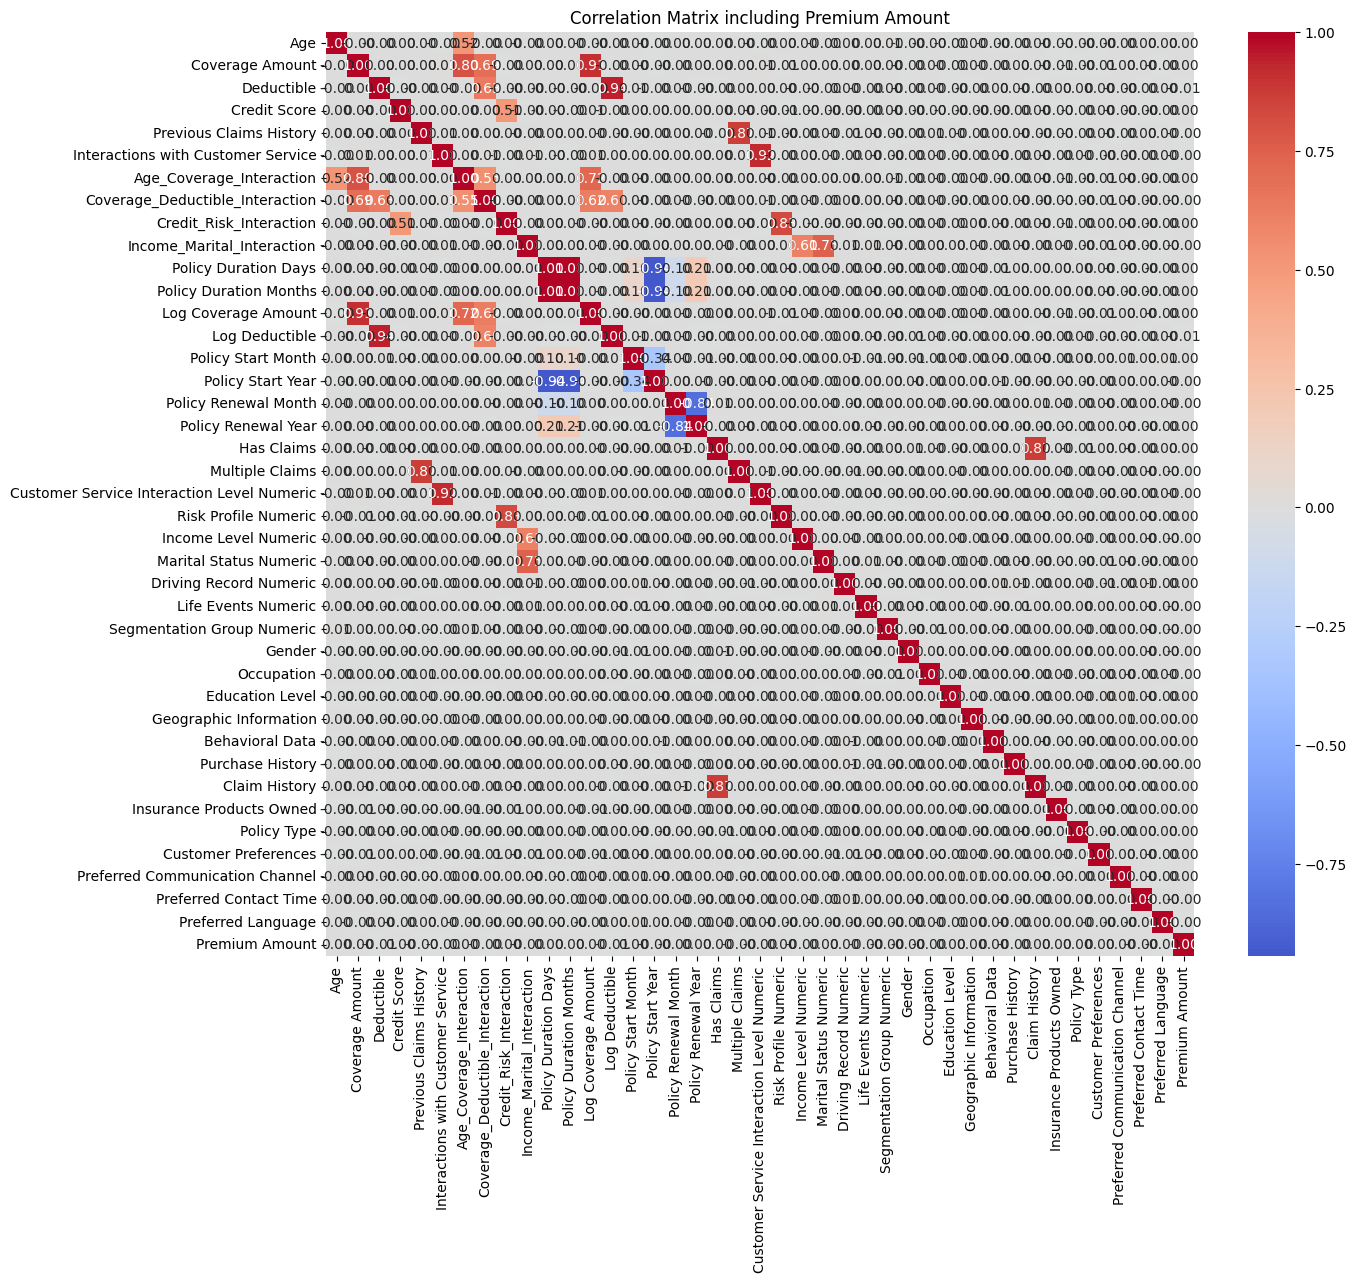

In [453]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar fitur sesuai feature selection kamu
features = [
    "Age",
    "Coverage Amount",
    "Deductible",
    "Credit Score",
    "Previous Claims History",
    "Interactions with Customer Service",
    "Age_Coverage_Interaction",
    "Coverage_Deductible_Interaction",
    "Credit_Risk_Interaction",
    "Income_Marital_Interaction",
    "Policy Duration Days",
    "Policy Duration Months",
    "Log Coverage Amount",
    "Log Deductible",
    "Policy Start Month",
    "Policy Start Year",
    "Policy Renewal Month",
    "Policy Renewal Year",
    "Has Claims",
    "Multiple Claims",
    "Customer Service Interaction Level Numeric",
    "Risk Profile Numeric",
    "Income Level Numeric",
    "Marital Status Numeric",
    "Driving Record Numeric",
    "Life Events Numeric",
    "Segmentation Group Numeric",
    "Gender",
    "Occupation",
    "Education Level",
    "Geographic Information",
    "Behavioral Data",
    "Purchase History",
    "Claim History",
    "Insurance Products Owned",
    "Policy Type",
    "Customer Preferences",
    "Preferred Communication Channel",
    "Preferred Contact Time",
    "Preferred Language"
]

# Pastikan semua fitur sudah ada di df
available_features = [f for f in features if f in df.columns]

# Konversi ke pandas untuk heatmap
df_pd = df.select(available_features + ["Premium Amount"]).to_pandas()

# Hitung korelasi Pearson
corr = df_pd.corr()

# Plot heatmap korelasi fitur dengan target Premium Amount
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix including Premium Amount")
plt.show()

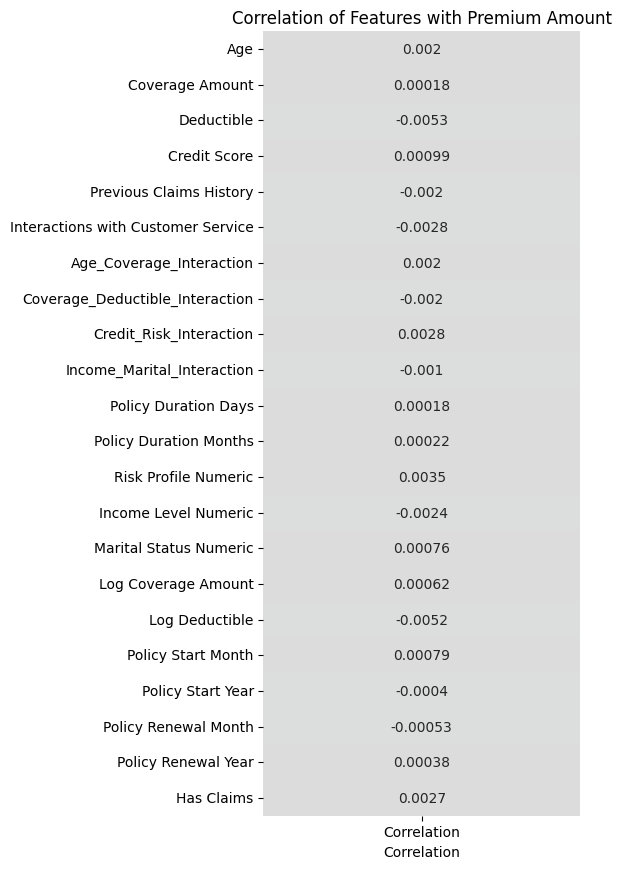

In [454]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi fitur terhadap target saja (1 kolom)
corr_target = df_num.corr()["Premium Amount"].drop("Premium Amount")

# Buat DataFrame agar bisa plot heatmap 1 kolom
corr_target_df = corr_target.to_frame(name="Correlation")

plt.figure(figsize=(6, len(corr_target) * 0.4))
sns.heatmap(corr_target_df, annot=True, cmap="coolwarm", cbar=False, vmin=-1, vmax=1)
plt.title("Correlation of Features with Premium Amount")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()

Feature Importances:
Age_Coverage_Interaction              0.089679
Coverage_Deductible_Interaction       0.083520
Credit Score                          0.081429
Credit_Risk_Interaction               0.080932
Policy Duration Days                  0.080078
Age                                   0.065477
Interactions with Customer Service    0.064546
Log Deductible                        0.050678
Deductible                            0.050622
Policy Start Month                    0.050375
Policy Renewal Month                  0.047918
Coverage Amount                       0.046107
Log Coverage Amount                   0.046050
Income_Marital_Interaction            0.034177
Previous Claims History               0.032101
Policy Duration Months                0.028275
Marital Status Numeric                0.020225
Income Level Numeric                  0.018590
Has Claims                            0.011109
Policy Start Year                     0.009510
Risk Profile Numeric                  0

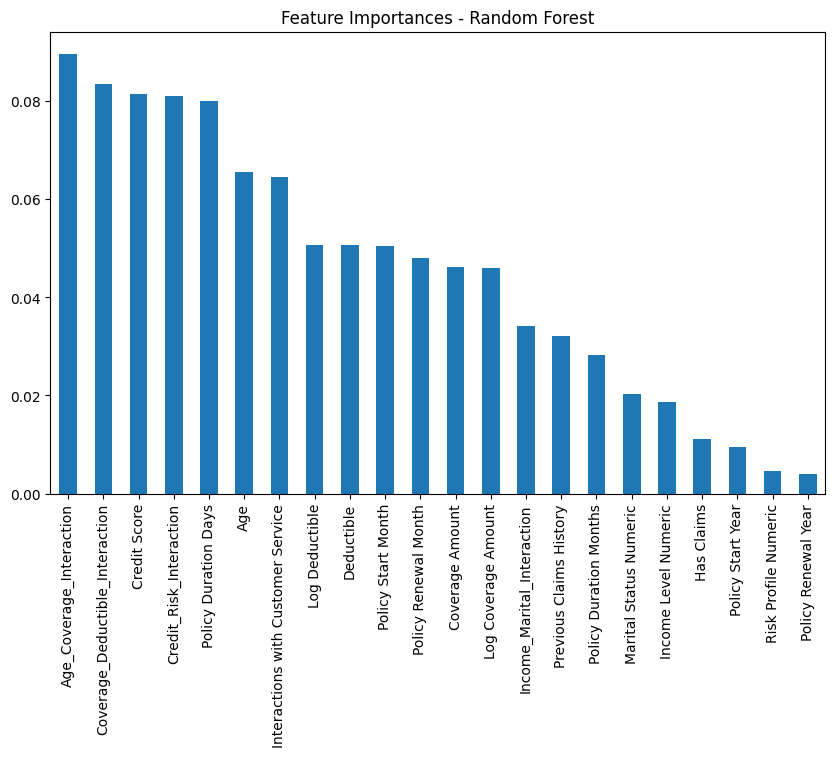

In [455]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Data dalam format pandas
X = df.select(num_features).to_pandas()
y = df.select("Premium Amount").to_pandas().values.ravel()

# Latih model Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Ambil feature importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=num_features).sort_values(ascending=False)

print("Feature Importances:")
print(feature_importance)

# Plot
plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.show()

In [456]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Selected features
selected_features = [
    "Age_Coverage_Interaction",
    "Coverage_Deductible_Interaction",
    "Credit Score",
    "Credit_Risk_Interaction",
    "Policy Duration Days",
    "Age",
    "Interactions with Customer Service"
    # "Log Deductible",
    # "Deductible",
    # "Policy Start Month",
    # "Policy Renewal Month",
    # "Coverage Amount",
    # "Log Coverage Amount",
    # "Income_Marital_Interaction",
    # "Previous Claims History",
    # "Policy Duration Months",
    # "Marital Status Numeric",
    # "Income Level Numeric",
    # "Has Claims",
    # "Policy Start Year",
    # "Risk Profile Numeric",
    # "Policy Renewal Year"
]

# Split features and target
X = df.select(selected_features).to_pandas()
y = df.select("Premium Amount").to_pandas().values.ravel()

# Normalize features and target using StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1)).ravel()

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Modeling
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_val)

# Evaluation
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

MSE: 1.0267, RMSE: 1.0132, MAE: 0.8723


In [ ]:
cols_to_drop = [
    "Customer ID", "Location", "Policy Start Date", "Policy Renewal Date",
    "Policy Start Date_dt", "Policy Renewal Date_dt"
]

existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

df = df.drop(existing_cols_to_drop)

In [ ]:
features = [
    # Numerik & fitur hasil engineering
    "Age",
    "Coverage Amount",
    "Deductible",
    "Credit Score",
    "Previous Claims History",
    "Interactions with Customer Service",
    "Age_Coverage_Interaction",
    "Policy Duration Days",
    "Policy Duration Months",

    # Kategori numerik hasil mapping (langsung bisa dipakai)
    "Risk Profile Numeric",
    "Income Level Numeric",
    "Marital Status Numeric",

    # Kategori asli yang perlu encoding (string)
    "Gender",
    "Occupation",
    "Education Level",
    "Geographic Information",
    "Behavioral Data",
    "Purchase History",
    "Claim History",
    "Insurance Products Owned",
    "Policy Type",
    "Customer Preferences",
    "Preferred Communication Channel",
    "Preferred Contact Time",
    "Preferred Language",
    "Driving Record",
    "Life Events",
    "Segmentation Group",
    
    # Target
    "Premium Amount"
]

df = df.select(features)

In [ ]:
df

Age,Coverage Amount,Deductible,Credit Score,Previous Claims History,Interactions with Customer Service,Age_Coverage_Interaction,Policy Duration Days,Policy Duration Months,Risk Profile Numeric,Income Level Numeric,Marital Status Numeric,Gender,Occupation,Education Level,Geographic Information,Behavioral Data,Purchase History,Claim History,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Driving Record,Life Events,Segmentation Group,Premium Amount
i64,i64,f64,i64,i64,i64,i64,i64,i32,i32,i32,i32,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64
43,277063,868.09,470,4,5,11913709,584,19,1,2,2,"""Female""","""Student""","""High School""","""Suburban""","""Inactive""","""Frequent""","""3+ Claims""","""Life""","""Quarterly""","""Eco-Friendly""","""SMS""","""Morning""","""Mandarin""","""Minor Violations""","""Retirement""","""C""",2122.99
22,102202,782.75,577,3,10,2248444,962,32,1,2,2,"""Female""","""Student""","""Master""","""Urban""","""Inactive""","""One-time""","""No Claims""","""Life""","""Semi-Annual""","""Eco-Friendly""","""Email""","""Evening""","""Indonesian""","""Clean""","""Divorce""","""A""",4928.58
63,468469,1283.98,390,3,13,29513547,1521,50,2,1,3,"""Male""","""Retired""","""High School""","""Urban""","""Occasional""","""Infrequent""","""No Claims""","""Home""","""Semi-Annual""","""Fast Service""","""Phone""","""Morning""","""Spanish""","""Major Violations""","""Divorce""","""B""",4528.29
60,819239,1502.43,662,4,13,49154340,1061,35,1,3,4,"""Female""","""Business Owner""","""Bachelor""","""Suburban""","""Active""","""One-time""","""No Claims""","""Multiple""","""Monthly""","""Eco-Friendly""","""Phone""","""Evening""","""Spanish""","""Minor Violations""","""Marriage""","""D""",1415.09
55,914230,1584.62,340,0,17,50282650,1570,52,1,2,2,"""Male""","""Teacher""","""PhD""","""Suburban""","""Active""","""Infrequent""","""1-2 Claims""","""Health""","""Annual""","""Comprehensive Coverage""","""SMS""","""Morning""","""French""","""Major Violations""","""Childbirth""","""B""",3892.71
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
20,243014,1502.58,484,0,12,4860280,893,29,1,3,3,"""Female""","""Business Owner""","""Bachelor""","""Urban""","""Occasional""","""One-time""","""3+ Claims""","""Multiple""","""Annual""","""Fast Service""","""Phone""","""Morning""","""French""","""Clean""","""Marriage""","""A""",1430.08
19,564522,1995.5,789,1,8,10725918,999,33,1,3,2,"""Female""","""Retired""","""PhD""","""Rural""","""New""","""Infrequent""","""No Claims""","""Home""","""Annual""","""Eco-Friendly""","""SMS""","""Afternoon""","""Spanish""","""Minor Violations""","""Divorce""","""D""",1093.55
57,658445,141.81,337,1,7,37531365,497,16,3,2,2,"""Male""","""Teacher""","""High School""","""Suburban""","""Active""","""Frequent""","""3+ Claims""","""Home""","""Annual""","""Comprehensive Coverage""","""Email""","""Afternoon""","""Spanish""","""Clean""","""Childbirth""","""A""",4999.39


In [ ]:
df

Age,Coverage Amount,Deductible,Credit Score,Previous Claims History,Interactions with Customer Service,Age_Coverage_Interaction,Policy Duration Days,Policy Duration Months,Risk Profile Numeric,Income Level Numeric,Marital Status Numeric,Gender,Occupation,Education Level,Geographic Information,Behavioral Data,Purchase History,Claim History,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Driving Record,Life Events,Segmentation Group,Premium Amount
i64,i64,f64,i64,i64,i64,i64,i64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,f64
43,277063,868.09,470,4,5,11913709,584,19,1,2,2,0,2,3,0,3,0,1,5,2,2,3,0,2,0,0,0,2122.99
22,102202,782.75,577,3,10,2248444,962,32,1,2,2,0,2,1,2,3,1,2,5,0,2,2,2,0,2,1,1,4928.58
63,468469,1283.98,390,3,13,29513547,1521,50,2,1,3,2,7,3,2,2,2,2,0,0,0,1,0,1,1,1,2,4528.29
60,819239,1502.43,662,4,13,49154340,1061,35,1,3,4,0,3,0,0,1,1,2,1,3,2,1,2,1,0,3,3,1415.09
55,914230,1584.62,340,0,17,50282650,1570,52,1,2,2,2,0,2,0,1,2,0,2,1,1,3,0,4,1,4,2,3892.71
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
20,243014,1502.58,484,0,12,4860280,893,29,1,3,3,0,3,0,2,2,1,1,1,1,0,1,0,4,2,3,1,1430.08
19,564522,1995.5,789,1,8,10725918,999,33,1,3,2,0,7,2,1,0,2,2,0,1,2,3,1,1,0,1,3,1093.55
57,658445,141.81,337,1,7,37531365,497,16,3,2,2,2,0,3,0,1,0,1,0,1,1,2,1,1,2,4,1,4999.39


## Normalisasi Data

In [ ]:
numeric_cols = [
    "Age", "Coverage Amount", "Deductible", "Credit Score",
    "Previous Claims History", "Interactions with Customer Service",
    "Age_Coverage_Interaction", "Policy Duration Days", "Policy Duration Months",
    "Risk Profile Numeric", "Income Level Numeric", "Marital Status Numeric",
    "Gender", "Occupation", "Education Level", "Geographic Information",
    "Behavioral Data", "Purchase History", "Claim History", "Insurance Products Owned",
    "Policy Type", "Customer Preferences", "Preferred Communication Channel",
    "Preferred Contact Time", "Preferred Language", "Driving Record", "Life Events",
    "Segmentation Group", "Premium Amount"
]

for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    df = df.with_columns(
        ((pl.col(col) - mean_val) / std_val).alias(col)
    )

In [ ]:
df

# Data Modelling

## Train-Validation Split

In [ ]:
import polars as pl
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Misal df sudah siap, dengan fitur numerik dan kategori yang sudah di-encode dan dinormalisasi

# Tentukan target dan fitur
target_col = "Premium Amount"  # sesuaikan target kamu
feature_cols = [col for col in df.columns if col != target_col]

# Split train-validation (misal 80-20)
train_df, val_df = train_test_split(df.to_pandas(), test_size=0.2, random_state=42)

X_train = train_df[feature_cols]
y_train = train_df[target_col]

X_val = val_df[feature_cols]
y_val = val_df[target_col]

## Model Machine Learning

### Random Forest

In [ ]:
# Inisiasi model
model = RandomForestRegressor(random_state=42)

# Latih model di training set
model.fit(X_train, y_train)

# Evaluasi di validation set
y_pred_val = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hitung metrik evaluasi
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"Validation MSE: {mse_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Validation MAE: {mae_val:.4f}")
print(f"Validation R²: {r2_val:.4f}")

Validation MSE: 2021556.7511
Validation RMSE: 1421.8146
Validation MAE: 1228.5710
Validation R²: -0.0148


In [ ]:
# -- Cross-validation untuk evaluasi lebih robust --
cv_scores = cross_val_score(model, df[feature_cols].to_pandas(), df[target_col].to_pandas(),
                            cv=5, scoring='neg_mean_squared_error')

cv_rmse_scores = np.sqrt(-cv_scores)
print(f"CV RMSE scores: {cv_rmse_scores}")
print(f"Average CV RMSE: {cv_rmse_scores.mean()}")

KeyboardInterrupt: 